# El problema de los valores atípicos

Un valor atípico, también conocido como outlier, es cualquier medición que se encuentra por fuera del comportamiento general de una muestra de datos. Estos valores pueden ser muy problemáticos en el análisis de datos y el Machine Learning.

## ¿Por qué son problemáticos?

1. **Generan sesgos importantes en los modelos de ML:** Los valores atípicos pueden influir significativamente en los resultados de nuestros modelos, alterando las relaciones y patrones entre las variables.

2. **Información relevante:** A veces, los valores atípicos contienen información relevante sobre la naturaleza de los datos. Si no se manejan adecuadamente, podríamos perder información valiosa.

3. **Detección temprana de fallos:** En algunos casos, los valores atípicos pueden indicar errores de medición o novedades en los datos, lo que nos permite detectar posibles fallos en el proceso o problemas en la recolección de datos.

## ¿Cómo identificar los valores atípicos?

Existen varios métodos estadísticos para identificar valores atípicos en nuestros datos:

1. **Z-Score:** Mide la distancia (en desviaciones estándar) de un punto dado a la media de la muestra. Si el valor absoluto del Z-Score es mayor a un umbral, generalmente 2 o 3, se considera un valor atípico.

2. **Técnicas de clustering como DBSCAN:** Los algoritmos de clustering pueden ayudarnos a identificar grupos de puntos que son densos y que están rodeados de regiones con baja densidad, lo que puede ayudar a detectar valores atípicos.

3. **Rango intercuartílico (IQR):** Si un valor q es menor que Q1 - 1.5 * IQR o mayor que Q3 + 1.5 * IQR, donde Q1 es el primer cuartil, Q3 es el tercer cuartil e IQR es el rango intercuartílico, se considera un valor atípico.

Es importante tener en cuenta que la identificación de valores atípicos debe realizarse con cuidado y contexto. No todos los valores que se salen de lo común son necesariamente atípicos, y su manejo dependerá del tipo de datos y del análisis que estemos realizando.

En resumen, los valores atípicos pueden ser problemáticos en el análisis de datos y el Machine Learning, pero su detección y manejo adecuados nos permiten obtener resultados más precisos y significativos en nuestras investigaciones y modelos.
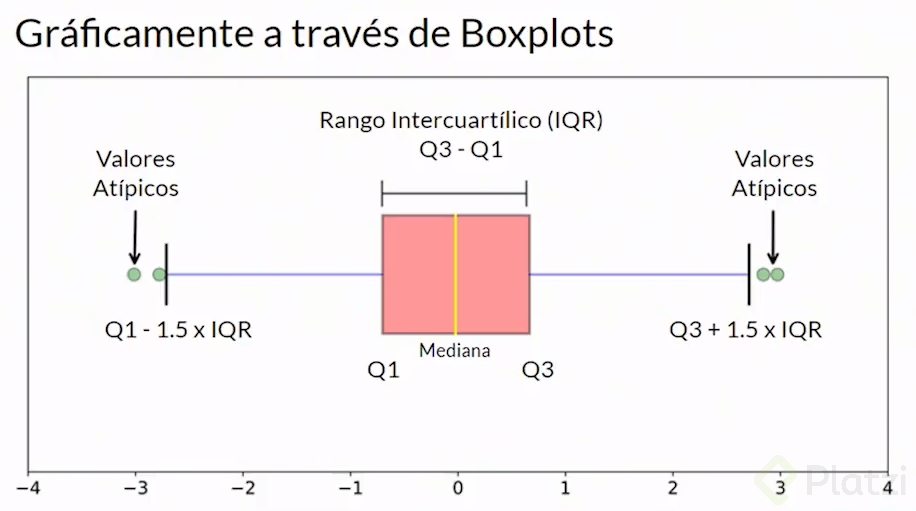

# Regresiones robustas 

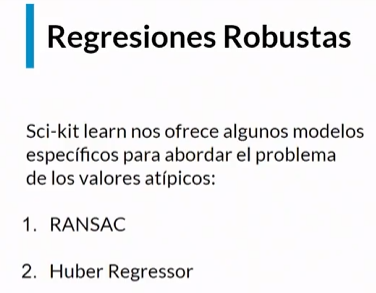

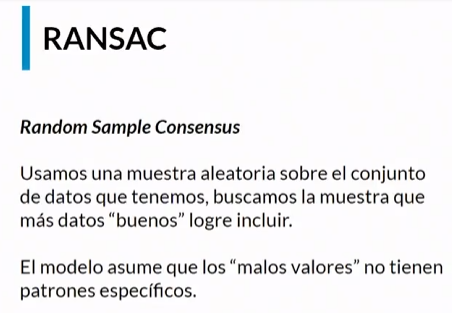

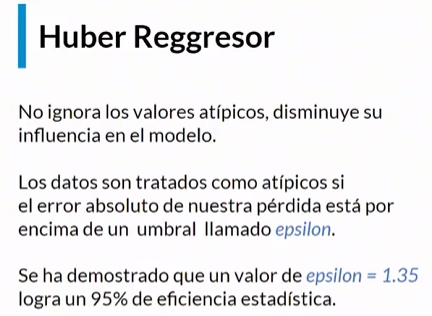

de le agrego al csv de felizidad valores atipicos al final y de nombro felicidad_corrupta 

In [1]:
import pandas as pd
from sklearn.linear_model import RANSACRegressor, HuberRegressor

from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('/home/roy/Scikitlearn/data/felicidad_corrupt.csv')
print(df.head())
print(df.tail())

       country  rank  score      high       low       gdp    family    lifexp  \
0       Norway     1  7.537  7.594445  7.479556  1.616463  1.533524  0.796667   
1      Denmark     2  7.522  7.581728  7.462272  1.482383  1.551122  0.792566   
2      Iceland     3  7.504  7.622030  7.385970  1.480633  1.610574  0.833552   
3  Switzerland     4  7.494  7.561772  7.426227  1.564980  1.516912  0.858131   
4      Finland     5  7.469  7.527542  7.410458  1.443572  1.540247  0.809158   

    freedom  generosity  corruption  dystopia  
0  0.635423    0.362012    0.315964  2.277027  
1  0.626007    0.355280    0.400770  2.313707  
2  0.627163    0.475540    0.153527  2.322715  
3  0.620071    0.290549    0.367007  2.276716  
4  0.617951    0.245483    0.382612  2.430182  
    country  rank  score  high  low  gdp  family  lifexp  freedom  generosity  \
162       H   163    0.0   0.0  0.0  0.0     0.0     0.0      0.0         0.0   
163       I   164    0.0   0.0  0.0  0.0     0.0     0.0      0

In [9]:
X = df.drop(['country','score'],axis=1)
y = df[['score']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
estimadores = {
    'SVR': SVR(gamma='auto',C=1,epsilon=0.1),
    'RANSAC' : RANSACRegressor(),
    'HUBER' : HuberRegressor(epsilon=1.35)
}

In [11]:
for name, estimador in estimadores.items():
    estimador.fit(X_train,y_train)
    predictions = estimador.predict(X_test)
    
    print(name)
    print('MSE:' , mean_squared_error(y_test,predictions))

SVR
MSE: 0.07455771301888524
RANSAC
MSE: 1.2756410216035467e-19
HUBER
MSE: 1.1006109249996921e-06


/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SVR (Support Vector Regression):

MSE: 0.07455771301888524

Significado: El modelo SVR tiene un MSE de aproximadamente 0.0746. Cuanto más cercano a cero es el MSE, mejor es el rendimiento del modelo. En este caso, un MSE de 0.0746 indica que las predicciones del modelo SVR se desvían en promedio en aproximadamente 0.0746 unidades al cuadrado respecto a los valores reales. En general, este valor es aceptable, pero aún podría mejorarse.

RANSAC (RANdom SAmple Consensus) Regression:

MSE: 1.2756410216035467e-19

Significado: El modelo RANSAC tiene un MSE extremadamente bajo, cercano a cero (1e-19). Esto significa que las predicciones del modelo son prácticamente idénticas a los valores reales. Sin embargo, es importante tener en cuenta que un MSE tan bajo podría ser sospechoso y podría deberse a que el modelo está sobreajustando los datos o que hubo algún error en el cálculo.

HUBER Regression:

MSE: 1.1006109249996921e-06

Significado: El modelo HUBER tiene un MSE de alrededor de 0.0000011. Esto indica que las predicciones del modelo están desviándose en promedio en aproximadamente 0.0000011 unidades al cuadrado respecto a los valores reales. Un valor tan bajo de MSE también sugiere que el modelo está haciendo un buen trabajo al ajustarse a los datos, considerando la presencia de valores atípicos.